# 2. 가공변수 

- 여러 가공변수 중 의미있는 가공변수 사용예정
    - 총구매빈도(O)
    - 주구매가격대(X)
    - 최대구매가격대 (O)
    - 가장 최근 구매 이후 경과일 (X)
    - 가장 선호하는 구매 제품 /카테고리 (O)

In [59]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # 전체 열 보기

df_buy = pd.read_csv("../data/master_buy.csv", encoding = "cp949")
df_buy.drop("Unnamed: 0", axis = 1, inplace = True)
df_info = pd.read_csv("../data/master_crm.csv", encoding = "cp949")
# df_info.head()

In [5]:
df_buy.head(3)

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label
0,34410,20220429.0,에어컨,300만원 이상 400만원 이하,0
1,16983,20201017.0,냉장고,200만원 이상 300만원 이하,0
2,59837,20201220.0,뷰티기기,0만원 이상 100만원 이하,0


In [6]:
df_merge = pd.merge(df_info, df_buy, on = "고객ID", how = "inner")
df_merge.drop("label_x", axis = 1, inplace = True)
df_merge.head(3)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,매출일자(배송완료일자),타겟제품명,금액,label_y
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,20170630.0,정수기,0만원 이상 100만원 이하,0
1,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,20170628.0,정수기,0만원 이상 100만원 이하,0
2,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,20220111.0,스타일러,200만원 이상 300만원 이하,0


In [7]:
df_merge['매출일자(배송완료일자)'] = pd.to_datetime(df_merge['매출일자(배송완료일자)'].apply(lambda x : str(int(x))))

In [8]:
df_merge['매출일자(월)'] = df_merge['매출일자(배송완료일자)'].apply(lambda x : x.month)

In [9]:
df_merge.head(3)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,매출일자(배송완료일자),타겟제품명,금액,label_y,매출일자(월)
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,2017-06-30,정수기,0만원 이상 100만원 이하,0,6
1,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,2017-06-28,정수기,0만원 이상 100만원 이하,0,6
2,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,2022-01-11,스타일러,200만원 이상 300만원 이하,0,1


# 범주형 변수 간 상관관계 확인

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from tqdm import tqdm

# Cramér's V 통계량을 계산하는 함수
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# 데이터프레임 로드 (여기서는 예시로 'df'라고 가정)
# df = pd.read_csv('your_file.csv')

# 범주형 변수들의 목록
categorical_columns = df_merge.select_dtypes(include=['object', 'category']).columns

# 모든 범주형 변수 쌍에 대한 Cramér's V 계산
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)
for col in tqdm(categorical_columns):
    for row in categorical_columns:
        cramers_v_matrix.at[col, row] = cramers_v(df_merge[col], df_merge[row])


100%|███████████████████████████████████████████| 18/18 [00:39<00:00,  2.20s/it]


/Users/Lee/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


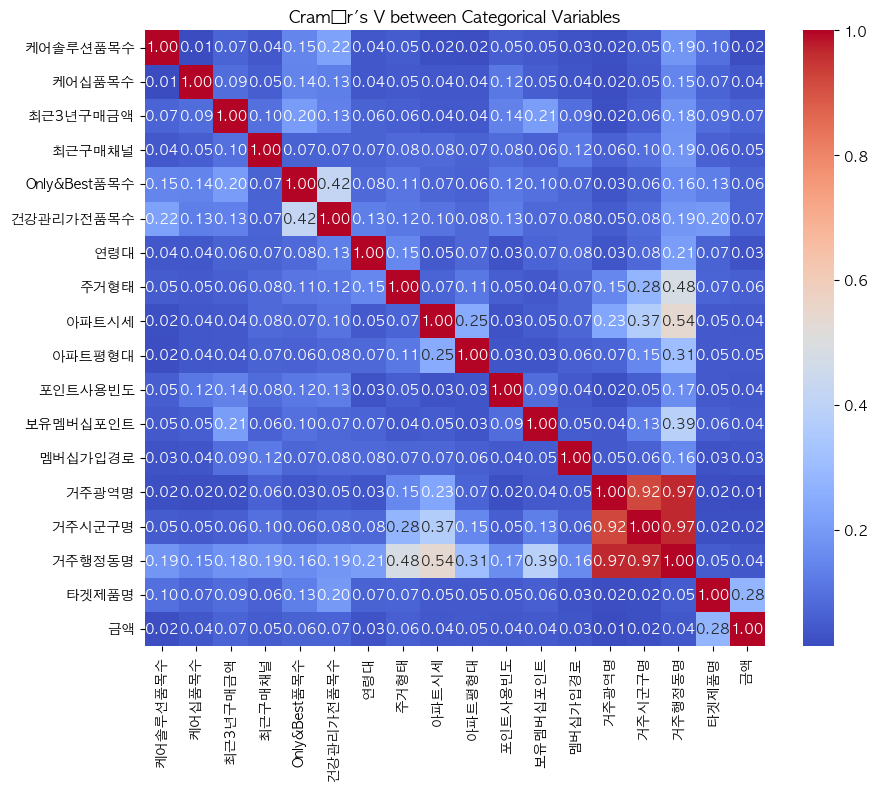

In [11]:
# Cramér's V 행렬 시각화
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cramér's V between Categorical Variables")
plt.show()

In [13]:
# # 높은 연관성을 가진 변수 쌍 식별
# highly_correlated_pairs = set()
# threshold = 0.9  # 임계값 설정
# for col in cramers_v_matrix.columns:
#     for row in cramers_v_matrix.index:
#         if (cramers_v_matrix.at[col, row] > threshold) and (col != row):
#             highly_correlated_pairs.add(frozenset((col, row)))

# # 연관성이 높은 변수 중 하나를 제거, 각 쌍에서 임의로 하나를 제거
# for pair in highly_correlated_pairs:
#     pair = list(pair)
#     df_merge.drop(pair[1], axis=1, inplace=True)

In [ ]:
# df_merge.to_csv("df_merge.csv", encoding = "cp949")

# 가공변수 생성

* ML을 돌리든, 그래프 DB를 돌리든 aggregate된 형식의 가공변수 생성이 필요

- 총구매빈도(O)
- 주구매가격대(X)
- 최대구매가격대 (O)
- 가장 최근 구매 이후 경과일 (X)
- 가장 선호하는 구매 제품 /카테고리 (O)

In [14]:
df_merge.head(3)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주행정동명,매출일자(배송완료일자),타겟제품명,금액,label_y,매출일자(월)
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,일동,2017-06-30,정수기,0만원 이상 100만원 이하,0,6
1,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,일동,2017-06-28,정수기,0만원 이상 100만원 이하,0,6
2,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,일동,2022-01-11,스타일러,200만원 이상 300만원 이하,0,1


In [15]:
df_merge.columns

Index(['고객ID', '멤버십고객여부', '케어솔루션고객여부', '케어솔루션품목수', '케어십가입여부', '케어십품목수',
       '최근3년구매금액', '최근구매채널', 'Only&Best품목수', '건강관리가전품목수', '연령대', '주거형태',
       '아파트시세', '아파트평형대', '포인트사용빈도', '보유멤버십포인트', '멤버십가입경로', '제휴카드보유여부',
       '프리미엄카드보유여부', '제휴가입여부', '멤버십앱설치여부', '거주행정동명', '매출일자(배송완료일자)', '타겟제품명',
       '금액', 'label_y', '매출일자(월)'],
      dtype='object')

In [16]:
df_merge.groupby(['고객ID']).count()['label_y']

고객ID
1         3
2         3
3         5
4         3
5         6
         ..
104347    3
104348    3
104349    5
104350    6
104351    6
Name: label_y, Length: 102723, dtype: int64

In [17]:
df_info.head(3)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0
2,3,NaN,1.0,0품목,0,0품목,0원,하이마트,1품목,2품목,NaN,아파트,5~6억,30평대,미사용,NaN,NaN,0,0,0,NaN,경기,화성시,새솔동,0


## 총구매빈도(O)

In [18]:
#
df_info = df_info.merge(df_merge.groupby(['고객ID']).count()['label_y'], on = "고객ID")
df_info = df_info.rename(columns = {"label_y" : "총구매빈도"})
df_info.head(3)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,총구매빈도
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,3
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,3
2,3,NaN,1.0,0품목,0,0품목,0원,하이마트,1품목,2품목,NaN,아파트,5~6억,30평대,미사용,NaN,NaN,0,0,0,NaN,경기,화성시,새솔동,0,5


## 주구매가격대(X)


In [21]:
# 값 대치
df_merge['금액_중간값'] = df_merge['금액'].replace(to_replace={"0만원 이상 100만원 이하":50 , "100만원 이상 200만원 이하":150, "200만원 이상 300만원 이하":250, "300만원 이상 400만원 이하":350, "400만원 이상 500만원 이하":450, "500만원 이상 600만원 이하":550, "600만원 이상 700만원 이하":650, "700만원 이상 800만원 이하":750, "800만원 이상 900만원 이하":850, "900만원 이상 1000만원 이하":950, "1000만원 이상":1000 })

In [25]:
# 고객별로 가장 많이 구매한 가격 범위 
result = df_merge.groupby('고객ID')['금액'].agg(pd.Series.mode)
result

고객ID
1                              0만원 이상 100만원 이하
2                              0만원 이상 100만원 이하
3         [0만원 이상 100만원 이하, 100만원 이상 200만원 이하]
4                              0만원 이상 100만원 이하
5                            100만원 이상 200만원 이하
                          ...                 
104347                         0만원 이상 100만원 이하
104348                         0만원 이상 100만원 이하
104349                         0만원 이상 100만원 이하
104350                         0만원 이상 100만원 이하
104351                         0만원 이상 100만원 이하
Name: 금액, Length: 102723, dtype: object

In [26]:
def extract_mainprice(prices):
    if isinstance(prices, str):
        return prices
    else:
        return prices[-1]

In [27]:
df_info['주구매가격대'] = result.reset_index(drop = True)

In [28]:
df_info['주구매가격대'] = df_info['주구매가격대'].apply(lambda x : extract_mainprice(x))
df_info.head(3)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,총구매빈도,주구매가격대
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,3,0만원 이상 100만원 이하
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,3,0만원 이상 100만원 이하
2,3,NaN,1.0,0품목,0,0품목,0원,하이마트,1품목,2품목,NaN,아파트,5~6억,30평대,미사용,NaN,NaN,0,0,0,NaN,경기,화성시,새솔동,0,5,100만원 이상 200만원 이하


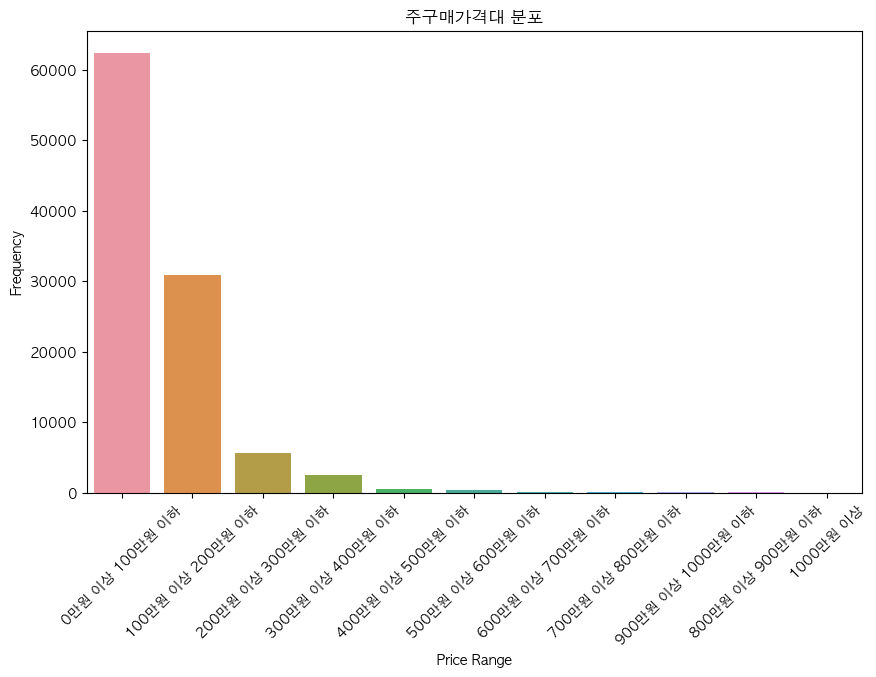

In [29]:
## 주구매가격대 분포
# 가격 범위별 빈도수 계산
price_range_counts = df_info['주구매가격대'].value_counts()

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title('주구매가격대 분포')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

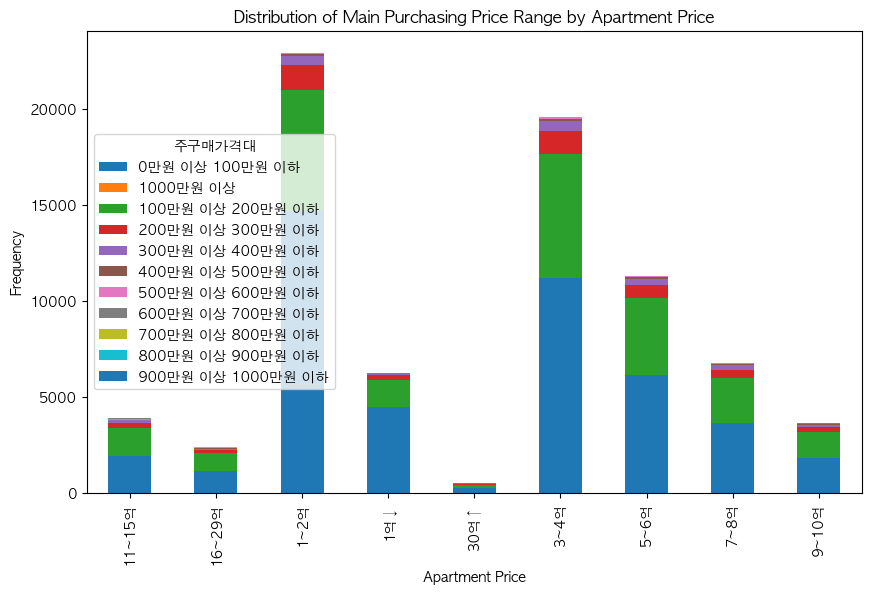

In [30]:
cross_tab = pd.crosstab(df_info['아파트시세'], df_info['주구매가격대'])

# 스택 바 차트 생성
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Main Purchasing Price Range by Apartment Price')
plt.xlabel('Apartment Price')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()


* 주구매가격대는 아파트시세 별로 큰 차이를 보이는 것 같지는 않음
* 따라서, 주구매가격대가 아니고, 가장 높은 구매가격대를 살펴보려고 함

## 최대구매가격대 (O)

* 각 고객별로 최대로 지불한 가격대의 차이가 얼마나 나는지 확인

In [31]:
# 고객별로 그룹화하고 각 그룹에서 최대값 찾기
max_purchase_by_customer = df_merge.groupby('고객ID')['금액_중간값'].max()

In [32]:
df_info['최대구매가격대'] = max_purchase_by_customer.reset_index(drop = True)
df_info.head(2)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,총구매빈도,주구매가격대,최대구매가격대
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,3,0만원 이상 100만원 이하,250.0
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,3,0만원 이상 100만원 이하,150.0


In [34]:
df_info['최대구매가격대'] = df_info['최대구매가격대'].replace(to_replace={ 50.0 : "0만원 이상 100만원 이하" , 150.0 : "100만원 이상 200만원 이하", 250.0 : "200만원 이상 300만원 이하", 350.0 : "300만원 이상 400만원 이하", 450.0 : "400만원 이상 500만원 이하", 550.0 : "500만원 이상 600만원 이하", 650.0 : "600만원 이상 700만원 이하", 750.0 : "700만원 이상 800만원 이하", 850.0 : "800만원 이상 900만원 이하", 950.0 : "900만원 이상 1000만원 이하", 1000.0 : "1000만원 이상" })

In [35]:
df_info.head(2)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,총구매빈도,주구매가격대,최대구매가격대
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,3,0만원 이상 100만원 이하,200만원 이상 300만원 이하
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,3,0만원 이상 100만원 이하,100만원 이상 200만원 이하


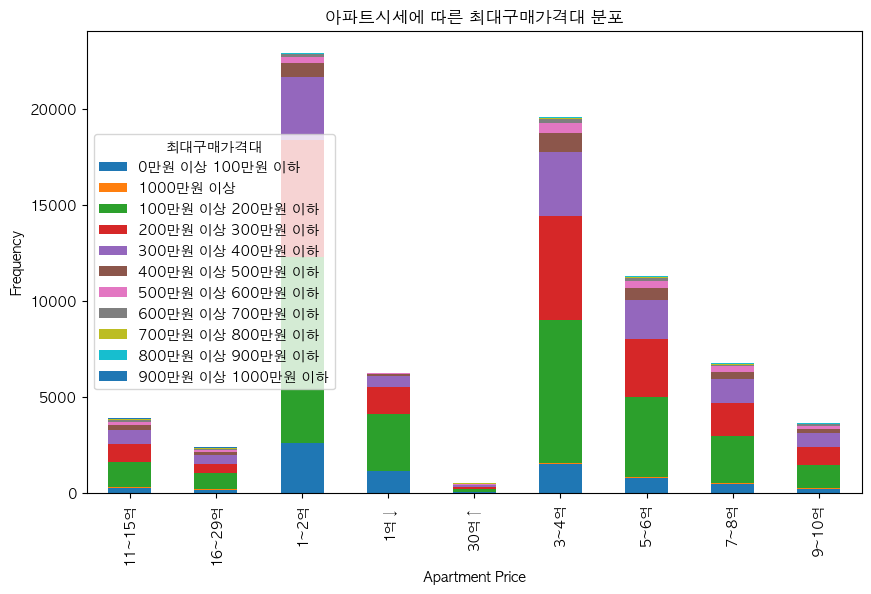

In [36]:
cross_tab = pd.crosstab(df_info['아파트시세'], df_info['최대구매가격대'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('아파트시세에 따른 최대구매가격대 분포')
plt.xlabel('Apartment Price')
plt.ylabel('Frequency')
plt.show()


In [37]:
# 각 행(아파트 시세)별로 총합을 계산
total_by_apt_price = cross_tab.sum(axis=1)
# 각 셀의 비율 계산
cross_tab_ratios = cross_tab.div(total_by_apt_price, axis=0) * 100
cross_tab_ratios

최대구매가격대,0만원 이상 100만원 이하,1000만원 이상,100만원 이상 200만원 이하,200만원 이상 300만원 이하,300만원 이상 400만원 이하,400만원 이상 500만원 이하,500만원 이상 600만원 이하,600만원 이상 700만원 이하,700만원 이상 800만원 이하,800만원 이상 900만원 이하,900만원 이상 1000만원 이하
아파트시세,,,,,,,,,,,
11~15억,6.007702,1.026958,34.736842,23.902439,18.279846,6.521181,4.801027,2.182285,0.924262,0.924262,0.693196
16~29억,6.764706,1.218487,34.327731,21.302521,17.983193,7.016807,4.537815,2.563025,1.722689,1.428571,1.134454
1~2억,11.259259,0.052288,42.270153,26.540305,14.296296,3.159041,1.542484,0.479303,0.187364,0.135076,0.078431
1억↓,18.078645,0.031969,47.330563,22.698210,9.031330,1.550512,0.895141,0.239770,0.063939,0.047954,0.031969
30억↑,6.746032,3.174603,30.952381,20.634921,15.674603,7.341270,6.944444,2.777778,1.984127,1.785714,1.984127
3~4억,7.715436,0.142690,38.077766,27.661418,16.847577,5.065484,2.665240,1.054885,0.290475,0.264995,0.214035
5~6억,6.780260,0.291339,36.929461,26.679615,18.036550,5.508961,3.310674,1.235985,0.547365,0.423766,0.256025
7~8억,6.724672,0.442413,36.189353,25.807403,18.625571,5.412181,3.996461,1.371479,0.516148,0.530895,0.383424
9~10억,5.883970,0.549904,33.599120,25.598020,19.879021,6.241408,4.481716,1.732197,0.879846,0.632389,0.522409


* 확실히 아파트 시세 30억 이상인 사람들이 1000만원 이상인 가격대를 구매하는 비율이 존재하였음

## 가장 최근 구매 이후 경과일 (X)

In [43]:
from datetime import datetime

# 날짜 형식으로 변환
df_merge['매출일자(배송완료일자)'] = pd.to_datetime(df_merge['매출일자(배송완료일자)'])

# 현재 날짜 계산
current_date = datetime.now()

# 각 고객 별로 최근 매출일자(배송완료일자)를 찾고 일수 차이 계산
customer_last_purchase_dates = df_merge.groupby('고객ID')['매출일자(배송완료일자)'].max().reset_index()
customer_last_purchase_dates['최근매출일로부터경과일'] = (current_date - customer_last_purchase_dates['매출일자(배송완료일자)']).dt.days
customer_last_purchase_dates

,고객ID,매출일자(배송완료일자),최근매출일로부터경과일
0,1,2022-01-11,710
1,2,2021-12-29,723
2,3,2020-08-17,1222
3,4,2021-06-05,930
4,5,2020-10-08,1170
...,...,...,...
102718,104347,2023-03-03,294
102719,104348,2023-07-15,160
102720,104349,2023-05-01,235
102721,104350,2023-03-11,286


In [44]:
df_info = df_info.merge(customer_last_purchase_dates[['고객ID', '매출일자(배송완료일자)', '최근매출일로부터경과일']], on = "고객ID")

In [45]:
df_info['최근매출일로부터경과일'].unique()

array([ 710,  723, 1222, ...,  236,  271,  278])

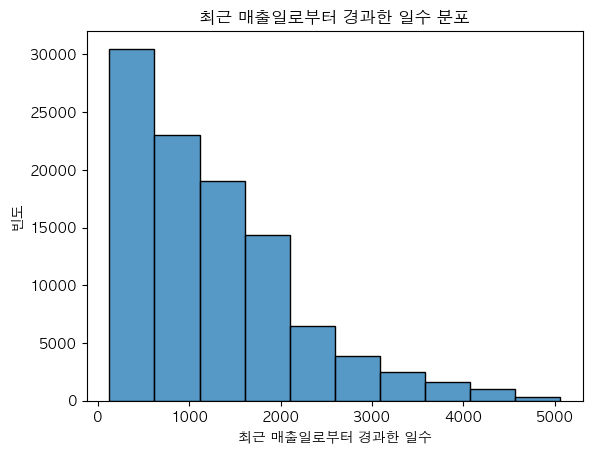

In [46]:
sns.histplot(data=df_info, x='최근매출일로부터경과일', bins=10)
plt.xlabel('최근 매출일로부터 경과한 일수')
plt.ylabel('빈도')
plt.title('최근 매출일로부터 경과한 일수 분포')
plt.show()

In [47]:
df_info['최근매출일로부터경과일'].describe()

count    102723.000000
mean       1251.700515
std         921.852856
min         123.000000
25%         533.000000
50%        1061.000000
75%        1719.000000
max        5062.000000
Name: 최근매출일로부터경과일, dtype: float64

In [48]:
print("마지막 구매일로부터 1년이 지나지 않은 고객 비율 : ", f"{((df_info['최근매출일로부터경과일'] <+ 365).sum()) / len(df_info) * 100}%")

마지막 구매일로부터 1년이 지나지 않은 고객 비율 :  16.632107707134722%


* 최근 매출일로부터 경과일수가 적은 고객에서 많은 고객까지 점진적으로 수가 줄어듦
* 1년 이내에 구매한 이력이 있는 고객이 18.2%에 불과

In [49]:
df_info['아파트시세'].unique()

array(['1억↓', '3~4억', '5~6억', '1~2억', '11~15억', '16~29억', nan, '7~8억',
       '9~10억', '30억↑'], dtype=object)

In [50]:
# 각 구간의 최솟값을 딕셔너리로 정의
min_values = {
    '1억↓': 1,  # 1억
    '3~4억': 3,  # 3억
    '5~6억': 5,  # 5억
    '1~2억': 1,  # 1억
    '11~15억': 11,  # 11억
    '16~29억': 16,  # 16억
    '7~8억': 7,  # 7억
    '9~10억': 9,  # 9억
    '30억↑': 30  # 30억
}

# 아파트 시세 값을 최솟값으로 대체
df_info['아파트시세_중간값'] = df_info['아파트시세'].replace(min_values)

df_info.head(2)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,총구매빈도,주구매가격대,최대구매가격대,매출일자(배송완료일자)_x,최근매출일로부터경과일_x,매출일자(배송완료일자)_y,최근매출일로부터경과일_y,매출일자(배송완료일자),최근매출일로부터경과일,아파트시세_중간값
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,3,0만원 이상 100만원 이하,200만원 이상 300만원 이하,2022-01-11,710,2022-01-11,710,2022-01-11,710,1.0
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,3,0만원 이상 100만원 이하,100만원 이상 200만원 이하,2021-12-29,723,2021-12-29,723,2021-12-29,723,3.0


## 가장 선호하는 구매 제품 (O)

In [52]:
# 빈 카테고리 열 만들어주기
df_merge['타겟제품_카테고리'] = np.nan

In [53]:
df_merge.loc[df_merge['타겟제품명'].isin(['냉장고', '김치냉장고', '정수기', '식기세척기', '전기레인지', '얼음정수기냉장고', '광파오븐']), '타겟제품_카테고리'] = "부엌"
df_merge.loc[df_merge['타겟제품명'].isin(['TV', 'PC', '모니터', 'AV', '휴대폰']), '타겟제품_카테고리'] = "디스플레이"
df_merge.loc[df_merge['타겟제품명'].isin(['세탁기', '청소기', '건조기', '스타일러', '미니워시', '워시타워', '로봇청소기']), '타겟제품_카테고리'] = "청소빨래"
df_merge.loc[df_merge['타겟제품명'].isin(['뷰티기기', '안마의자']), '타겟제품_카테고리'] = "건강관리"
df_merge.loc[df_merge['타겟제품명'].isin(['에어컨', '공기청정기']), '타겟제품_카테고리'] = "에어솔루션"
df_merge.head(2)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주행정동명,매출일자(배송완료일자),타겟제품명,금액,label_y,매출일자(월),금액_중간값,타겟제품_카테고리
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,일동,2017-06-30,정수기,0만원 이상 100만원 이하,0,6,50.0,부엌
1,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,일동,2017-06-28,정수기,0만원 이상 100만원 이하,0,6,50.0,부엌


In [54]:
# 각 고객ID 별로 제품 카테고리의 구매 횟수를 계산
customer_purchase_counts = df_merge.groupby(['고객ID', '타겟제품_카테고리']).size().reset_index(name='구매횟수')

# 각 고객ID 별로 가장 높은 구매 횟수를 찾아 해당하는 제품 카테고리를 반환
max_purchase_categories = customer_purchase_counts.groupby('고객ID').apply(lambda x: x[x['구매횟수'] == x['구매횟수'].max()]['타겟제품_카테고리'].tolist())

max_purchase_categories

고객ID
1                      [부엌]
2                      [부엌]
3                      [부엌]
4         [부엌, 에어솔루션, 청소빨래]
5                    [청소빨래]
                ...        
104347              [디스플레이]
104348    [부엌, 에어솔루션, 청소빨래]
104349              [에어솔루션]
104350              [에어솔루션]
104351        [디스플레이, 청소빨래]
Length: 102723, dtype: object

In [55]:
df_info['주구매제품카테고리'] = max_purchase_categories.reset_index(drop = True)
df_info.head(2)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,총구매빈도,주구매가격대,최대구매가격대,매출일자(배송완료일자)_x,최근매출일로부터경과일_x,매출일자(배송완료일자)_y,최근매출일로부터경과일_y,매출일자(배송완료일자),최근매출일로부터경과일,아파트시세_중간값,주구매제품카테고리
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,3,0만원 이상 100만원 이하,200만원 이상 300만원 이하,2022-01-11,710,2022-01-11,710,2022-01-11,710,1.0,[부엌]
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,3,0만원 이상 100만원 이하,100만원 이상 200만원 이하,2021-12-29,723,2021-12-29,723,2021-12-29,723,3.0,[부엌]


In [56]:
bin = []
for list in df_info['주구매제품카테고리'].values:
    bin += list

In [57]:
# Series 객체 생성
series = pd.Series(bin)

# 각 원소별 개수 확인
series.value_counts()

에어솔루션    48769
청소빨래     33665
부엌       27003
디스플레이    25657
건강관리      1616
dtype: int64

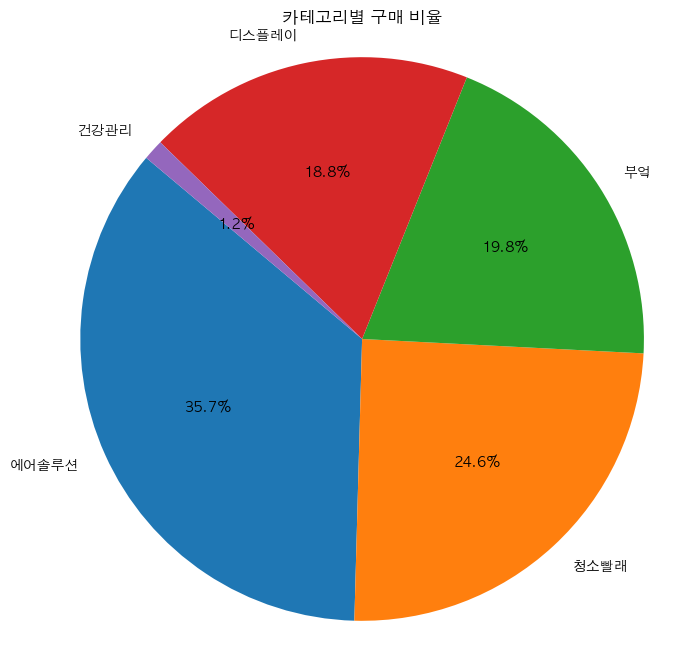

In [58]:
# 파이차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(series.value_counts(), labels=series.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('카테고리별 구매 비율')
plt.axis('equal')  # 원형 파이차트로 조정
plt.show()